In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

# Data preprocessing

In [4]:
# Load and preprocess the dataset
pop_dataset = pd.read_csv('C:\\Users\\Admin\\\Desktop\\Placements\\Projects\\World Population by Year analysis\\data\\WorldPopulation.csv')
pop_dataset.index = range(1, 71)
X_data = pop_dataset.drop(['Population', 'Urban', 'NetChange'], axis=1)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_data), columns=X_data.columns)
Y = pop_dataset['Population']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Models

Feature scaling is the process of normalising the range of features in a dataset. Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

### Linear Regression

In [6]:
# Linear regression
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred_LR = model_LR.predict(X_test)

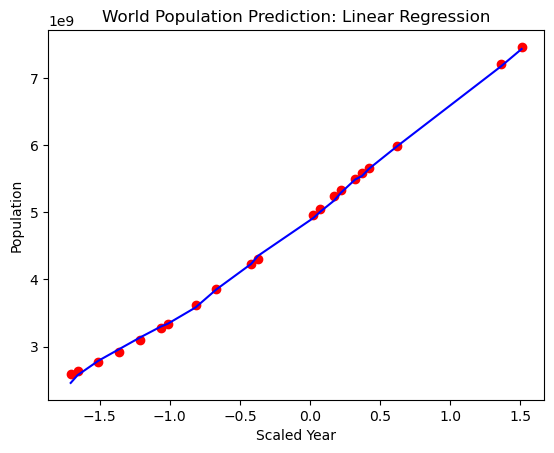

In [9]:
plt.scatter(X_test['Year'], Y_test, color='red')
sns.lineplot(X_test['Year'], Y_pred_LR, color='blue')
plt.title('World Population Prediction: Linear Regression')
plt.xlabel('Scaled Year')
plt.ylabel('Population')
plt.show()

In [8]:
print('Linear Regression Metrics:')
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred_LR))
print('R2 Score:', r2_score(Y_test, Y_pred_LR))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred_LR))

Linear Regression Metrics:
Mean Absolute Error: 33803393.75958963
R2 Score: 0.9990599862236123
Mean Squared Error: 1896014273658966.0


### Logistic Regression

In [198]:
model_LGR=LogisticRegression()
model_LGR.fit(X_train,Y_train)
Y_pred_LGR=model_LGR.predict(X_test)

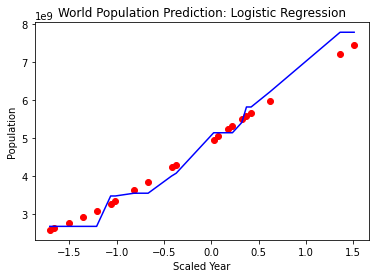

In [199]:
plt.scatter(X_test['Year'], Y_test, color = 'red')
sns.lineplot(X_test['Year'],Y_pred_LGR, color = 'blue')
plt.title('World Population Prediction: Logistic Regression')
plt.xlabel('Scaled Year')
plt.ylabel('Population')
plt.show()

In [ ]:
print('Logistic regression Metrics:')
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred_LGR))
print('R2 Score:', r2_score(Y_test, Y_pred_LGR))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred_LGR))

### XGBoost Regressor

In [204]:
# XGBoost
model_XGB = XGBRegressor(n_estimators=500, learning_rate=0.05)
model_XGB.fit(X_train, Y_train, early_stopping_rounds=5, eval_set=[(X_test, Y_test)], verbose=False)
Y_pred_XGB = model_XGB.predict(X_test)

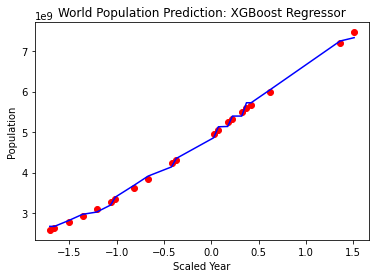

In [205]:
plt.scatter(X_test['Year'], Y_test, color='red')
sns.lineplot(X_test['Year'], Y_pred_XGB, color='blue')
plt.title('World Population Prediction: XGBoost Regressor')
plt.xlabel('Scaled Year')
plt.ylabel('Population')
plt.show()

In [ ]:
print('XGBoost Metrics:')
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred_XGB))
print('R2 Score:', r2_score(Y_test, Y_pred_XGB))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred_XGB))

### Random Forest Regressor

In [207]:
model_RFR = RandomForestRegressor(n_estimators=100, random_state=0)
model_RFR.fit(X_train, Y_train)
Y_pred_RFR = model_RFR.predict(X_test)

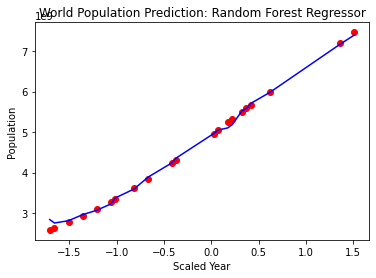

In [208]:
plt.scatter(X_test['Year'], Y_test, color='red')
sns.lineplot(X_test['Year'], Y_pred_RFR, color='blue')
plt.title('World Population Prediction: Random Forest Regressor')
plt.xlabel('Scaled Year')
plt.ylabel('Population')
plt.show()

In [ ]:
print('Random Forest Metrics:')
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred_RFR))
print('R2 Score:', r2_score(Y_test, Y_pred_RFR))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred_RFR))

The Linear Regression model exhibits the highest final score compared to other models, indicating its superior performance for the current world population prediction.